##**# COVID 19 Data Analysis**

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv and filter the data for two states, New York and Texas. This data will focus on the impact of weather in reported new cases for Washington and New York during their hottest months (July for New York and August for Texas). This data will also look at new cases during their coldest month.

**Important Note**: January is the coldest month for New York and Texas. However, at the time of testing, there is not enough data for January. Analyst instead focused on November.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

Task 1 : Environment Set up


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

##**Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose**

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [6]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [7]:
df.tail()

,date,state,fips,cases,deaths
17499,2021-01-14,Virginia,51,417839,5626
17500,2021-01-14,Washington,53,288127,3949
17501,2021-01-14,West Virginia,54,105219,1702
17502,2021-01-14,Wisconsin,55,561160,5729
17503,2021-01-14,Wyoming,56,48701,522


In [8]:
df.shape

(17504, 5)

In [9]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

#**Task 3: Data Wrangling and EDA (Exploratory Data Analysis)**

##Analyzing New York & Texas state data for Covid 19

In [10]:
#grabbing the Texas and NY data
ny_df = df[df['state']=='New York']
tx_df = df[df['state'] == 'Texas']

In [11]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [12]:
ny_df.tail()

,date,state,fips,cases,deaths
17262,2021-01-10,New York,36,1135849,39208
17317,2021-01-11,New York,36,1150028,39404
17372,2021-01-12,New York,36,1164819,39588
17427,2021-01-13,New York,36,1179523,39760
17482,2021-01-14,New York,36,1193710,39997


In [13]:
tx_df.head()

,date,state,fips,cases,deaths
98,2020-02-12,Texas,48,1,0
105,2020-02-13,Texas,48,2,0
112,2020-02-14,Texas,48,2,0
119,2020-02-15,Texas,48,2,0
126,2020-02-16,Texas,48,2,0


In [14]:
tx_df.tail()

,date,state,fips,cases,deaths
17275,2021-01-10,Texas,48,1967859,30599
17330,2021-01-11,Texas,48,1991625,30720
17385,2021-01-12,Texas,48,2018685,31017
17440,2021-01-13,Texas,48,2042009,31396
17495,2021-01-14,Texas,48,2071932,31819


In [15]:
ny_df.shape

(320, 5)

In [16]:
tx_df.shape

(338, 5)

##**Task4: New cases calculation for New York and Texas during their hottest and coldest months**

Finding new daily covid 19 cases in New York (new cases added everyday)



In [47]:
#calculate new cases in NY
newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [49]:
#add to the New York dataframe
ny_df['new_cases'] = newcase
ny_df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


Finding new daily covid 19 cases in Texas (new cases added everyday) 

In [50]:
#calculate new cases in TX
newcase = []
previuos_case = 0
for index, row in tx_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [20]:
#add to the Texas dataframe
tx_df['new_cases'] = newcase
tx_df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,state,fips,cases,deaths,new_cases
98,2020-02-12,Texas,48,1,0,1
105,2020-02-13,Texas,48,2,0,1
112,2020-02-14,Texas,48,2,0,0
119,2020-02-15,Texas,48,2,0,0
126,2020-02-16,Texas,48,2,0,0
134,2020-02-17,Texas,48,2,0,0
142,2020-02-18,Texas,48,2,0,0
150,2020-02-19,Texas,48,2,0,0
158,2020-02-20,Texas,48,2,0,0
166,2020-02-21,Texas,48,4,0,2


##**Task5:  Visualization of New Cases in New York and Texas during their hottest and coldest month**

Visual Representation of New Cases in New York during it's hottest month, July

In [51]:
ny_july_dates_31 = ny_df['date'][122:153]
ny_july_new_cases_31 = ny_df['new_cases'][122:153]

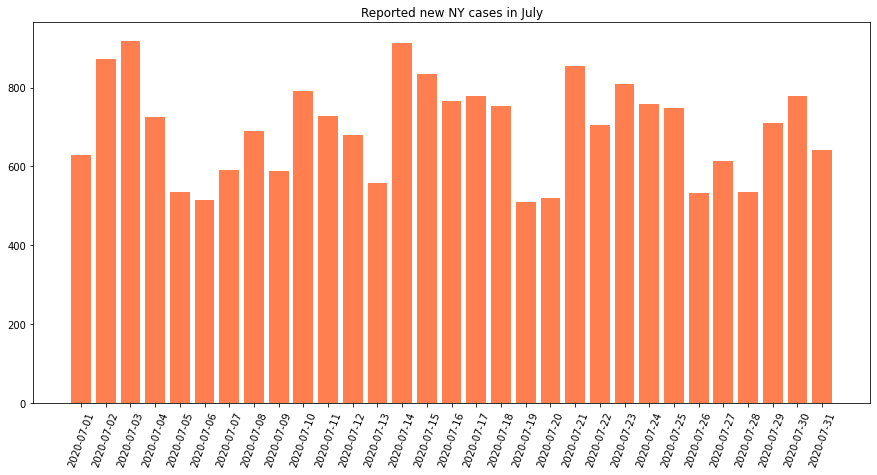

In [52]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_july_dates_31, height=ny_july_new_cases_31, color='coral')
plt.xticks(rotation=70)
plt.title('Reported new NY cases in July')
plt.show()

Visual Representation of New Cases in New York in November

In [53]:
ny_november_dates_30 = ny_df['date'][245:275]
ny_november_new_cases_30 = ny_df['new_cases'][245:275]

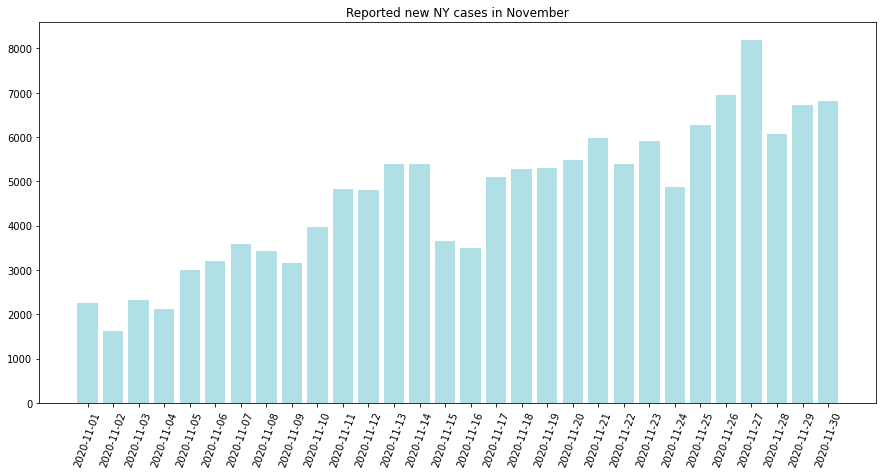

In [54]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_november_dates_30, height=ny_november_new_cases_30, color='powderblue')
plt.xticks(rotation=70)
plt.title('Reported new NY cases in November')
plt.show()

Visual Representation of New Cases in Texas during its hottest month, August

In [55]:
tx_august_dates_31 = tx_df['date'][171:202]
tx_august_new_cases_31 = tx_df['new_cases'][171:202]

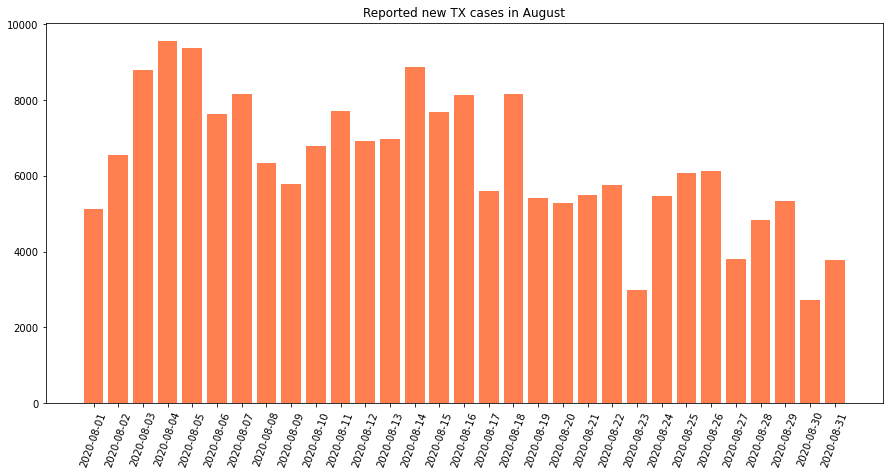

In [56]:
plt.figure(figsize=(15,7))
plt.bar(x=tx_august_dates_31, height=tx_august_new_cases_31, color='coral')
plt.xticks(rotation=70)
plt.title('Reported new TX cases in August')
plt.show()

Visual Representation of New Cases in Texas in November

In [57]:
tx_november_dates_30 = tx_df['date'][263:293]
tx_november_new_cases_30 = tx_df['new_cases'][263:293]

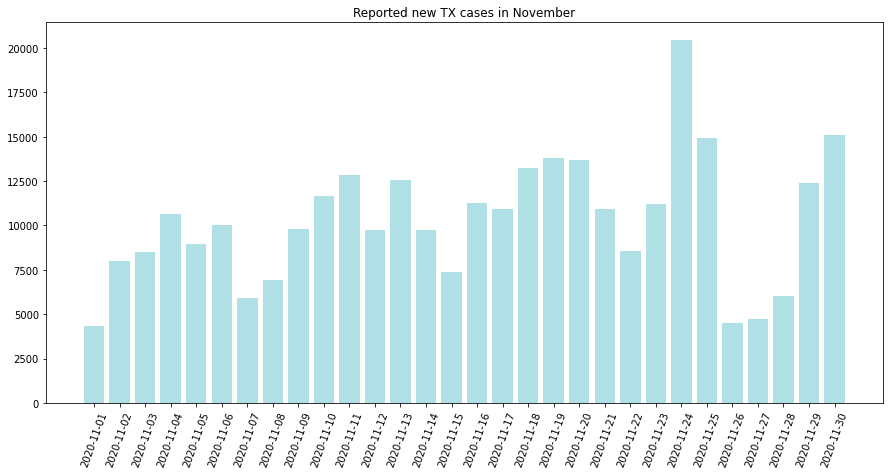

In [58]:
plt.figure(figsize=(15,7))
plt.bar(x=tx_november_dates_30, height=tx_november_new_cases_30, color='powderblue')
plt.xticks(rotation=70)
plt.title('Reported new TX cases in November')
plt.show()

##**6. Visualization of hottest and coldest months for New York and Texas**

Visual representation of new cases in New York in July and November 

In [59]:
#grab the NY July new cases for a new dataframe.
#only grab 30 days instead of 31 to match data with november
july_df = ny_df[['new_cases']][122:152].reset_index(drop=True)

In [60]:
#rename the column
july_df = july_df.rename(columns={"new_cases": "july_new_cases"})

In [61]:
#grab the NY November new cases for a new dataframe.
november_df = ny_df[['new_cases']][245:275]
november_df = november_df.reset_index(drop=True)

In [64]:
#rename the column
november_df = november_df.rename(columns={"new_cases": "november_new_cases"})

In [63]:
#join our dataframes together
#start the index at 1
new_york_hot_and_cold_df = pd.concat([november_df, july_df], axis=1)
new_york_hot_and_cold_df.index +=1

In [65]:
new_york_hot_and_cold_df.head(30)

,new_cases,july_new_cases
1,2259,628
2,1632,872
3,2317,919
4,2126,725
5,3002,536
6,3208,516
7,3587,590
8,3430,691
9,3149,588
10,3964,790


In [35]:
new_york_hot_and_cold_df.tail()

,november_new_cases,july_new_cases
26,6938,532
27,8179,613
28,6060,535
29,6732,711
30,6816,779


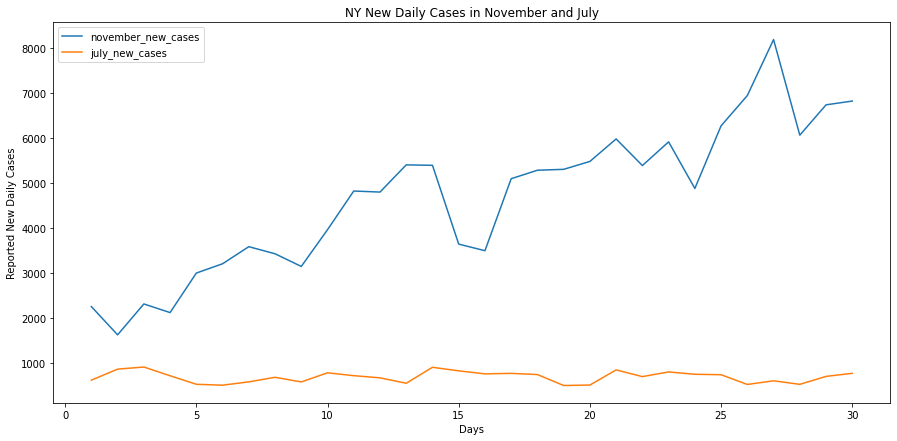

In [36]:
ny_visual_graph = new_york_hot_and_cold_df.plot(figsize=(15,7), title = "NY New Daily Cases in November and July", xlabel = 'Days', ylabel = 'Reported New Daily Cases')

Visual representation of new cases in Texas in July and November 

In [37]:
#grab the TX August new cases for a new dataframe.
#only grab 30 days instead of 31 to match data with november
august_df = tx_df[['new_cases']][171:201].reset_index(drop=True)

In [38]:
august_df = august_df.rename(columns={"new_cases": "august_new_cases"})

In [39]:
#grab the TX November new cases for a new dataframe.
tx_november_df = tx_df[['new_cases']][263:293]
tx_november_df = tx_november_df.reset_index(drop=True)

In [40]:
#rename the column
tx_november_df = tx_november_df.rename(columns={"new_cases": "november_new_cases"})

In [41]:
#join our dataframes together
#start the index at 1
texas_hot_and_cold_df = pd.concat([tx_november_df, august_df], axis=1)
texas_hot_and_cold_df.index +=1

In [42]:
texas_hot_and_cold_df.head()

,november_new_cases,august_new_cases
1,4338,5134
2,7991,6535
3,8512,8782
4,10627,9564
5,8975,9362


In [43]:
texas_hot_and_cold_df.tail(25)

,november_new_cases,august_new_cases
6,10014,7635
7,5929,8164
8,6935,6339
9,9798,5787
10,11644,6790
11,12857,7716
12,9727,6927
13,12584,6980
14,9750,8865
15,7368,7673


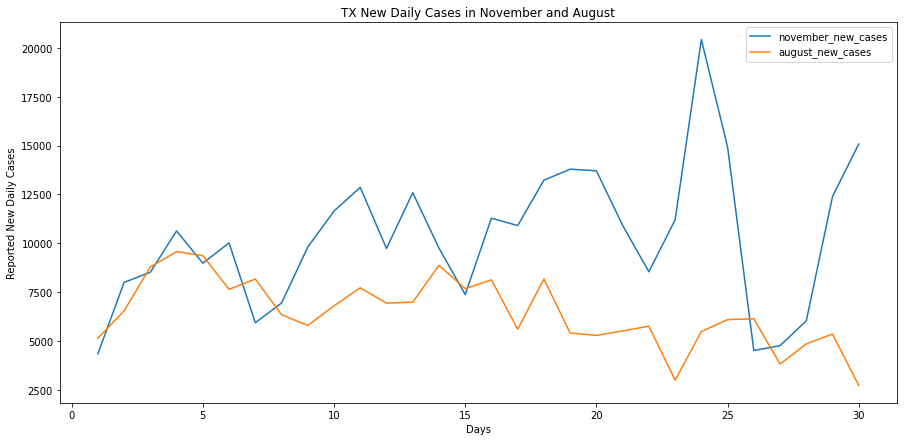

In [66]:
tx_visual_graph = texas_hot_and_cold_df.plot(figsize=(15,7), title = "TX New Daily Cases in November and August", xlabel = 'Days', ylabel = 'Reported New Daily Cases')

##**7.Conclusion**

**We** can observe the increasedslope of reported new cases in the winter months for both states.

The summer months boast a flatter line where each new day produced similar reported numbers.

One thing that could have had an effect is the increased testing around the thanksgiving holiday.
Concerned travelers tested more and this led to the sharp spikes observed in November.